# Understanding Stoicism through text analysis

I have been reading about stoicism and as I am just starting to learn about it I thought it would be interesting to get a feel for some of the key concepts that are important in the philosophy by analysing most frequent words in an introductory book on the subject. 

The book is 'Stoicism: A beginners guide to the history and philosophy of stoicism' by Dale Kingsley and this book was available to me as a pdf.

In [2]:
!pip install pdfplumber
!pip install wordcloud

  Created wheel for pdfplumber: filename=pdfplumber-0.5.25-py3-none-any.whl size=31564 sha256=e2a43deb609f98ab7afafb0af2525700e3d887c0de00aaae6eafc50a889772ea
  Stored in directory: c:\users\jack\appdata\local\pip\cache\wheels\8c\65\d1\67ceda23cc7fd669025b485b7f93bea3ee5799a09c95e74452
Successfully built pdfplumber


In [159]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import pdfplumber
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jack\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Read text from each page of the pdf into a single text string and print number of words read.

In [133]:
text = '' 
with pdfplumber.open('stoicism_beginner_guide.pdf') as pdf:
    for i in range(4,66):
        single_page_text = pdf.pages[i].extract_text()
        text = text + '\n' + single_page_text
    print ("There are {} words in the document.".format(len(text)))

There are 75971 words in the document.


Define words to exclude from the analysis, using standard stopwords plus additional words frequent in the text but that do not give a clearer idea of what the philosophy is all about

In [212]:
STOP_WORDS = nltk.corpus.stopwords.words('english')

newStopWords = ['stoic','stoicism','philosophy','epictetus','zeno','great','may','way','take','marcus','aurelius',
               'stoics','example','early','merely','book','man','modern','much','popular','roman','rather','area','emperor',
               'us','thing','often','aspect','greek','approach','teaching','proposition','christianity','even','time','one',
               'day','always','many','now','exercise','important','concept','principle','daily','principles','daily',]
STOP_WORDS.extend(newStopWords)

In [213]:
#tokenise the data set
words = word_tokenize(text)

# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word.lower() not in STOP_WORDS]

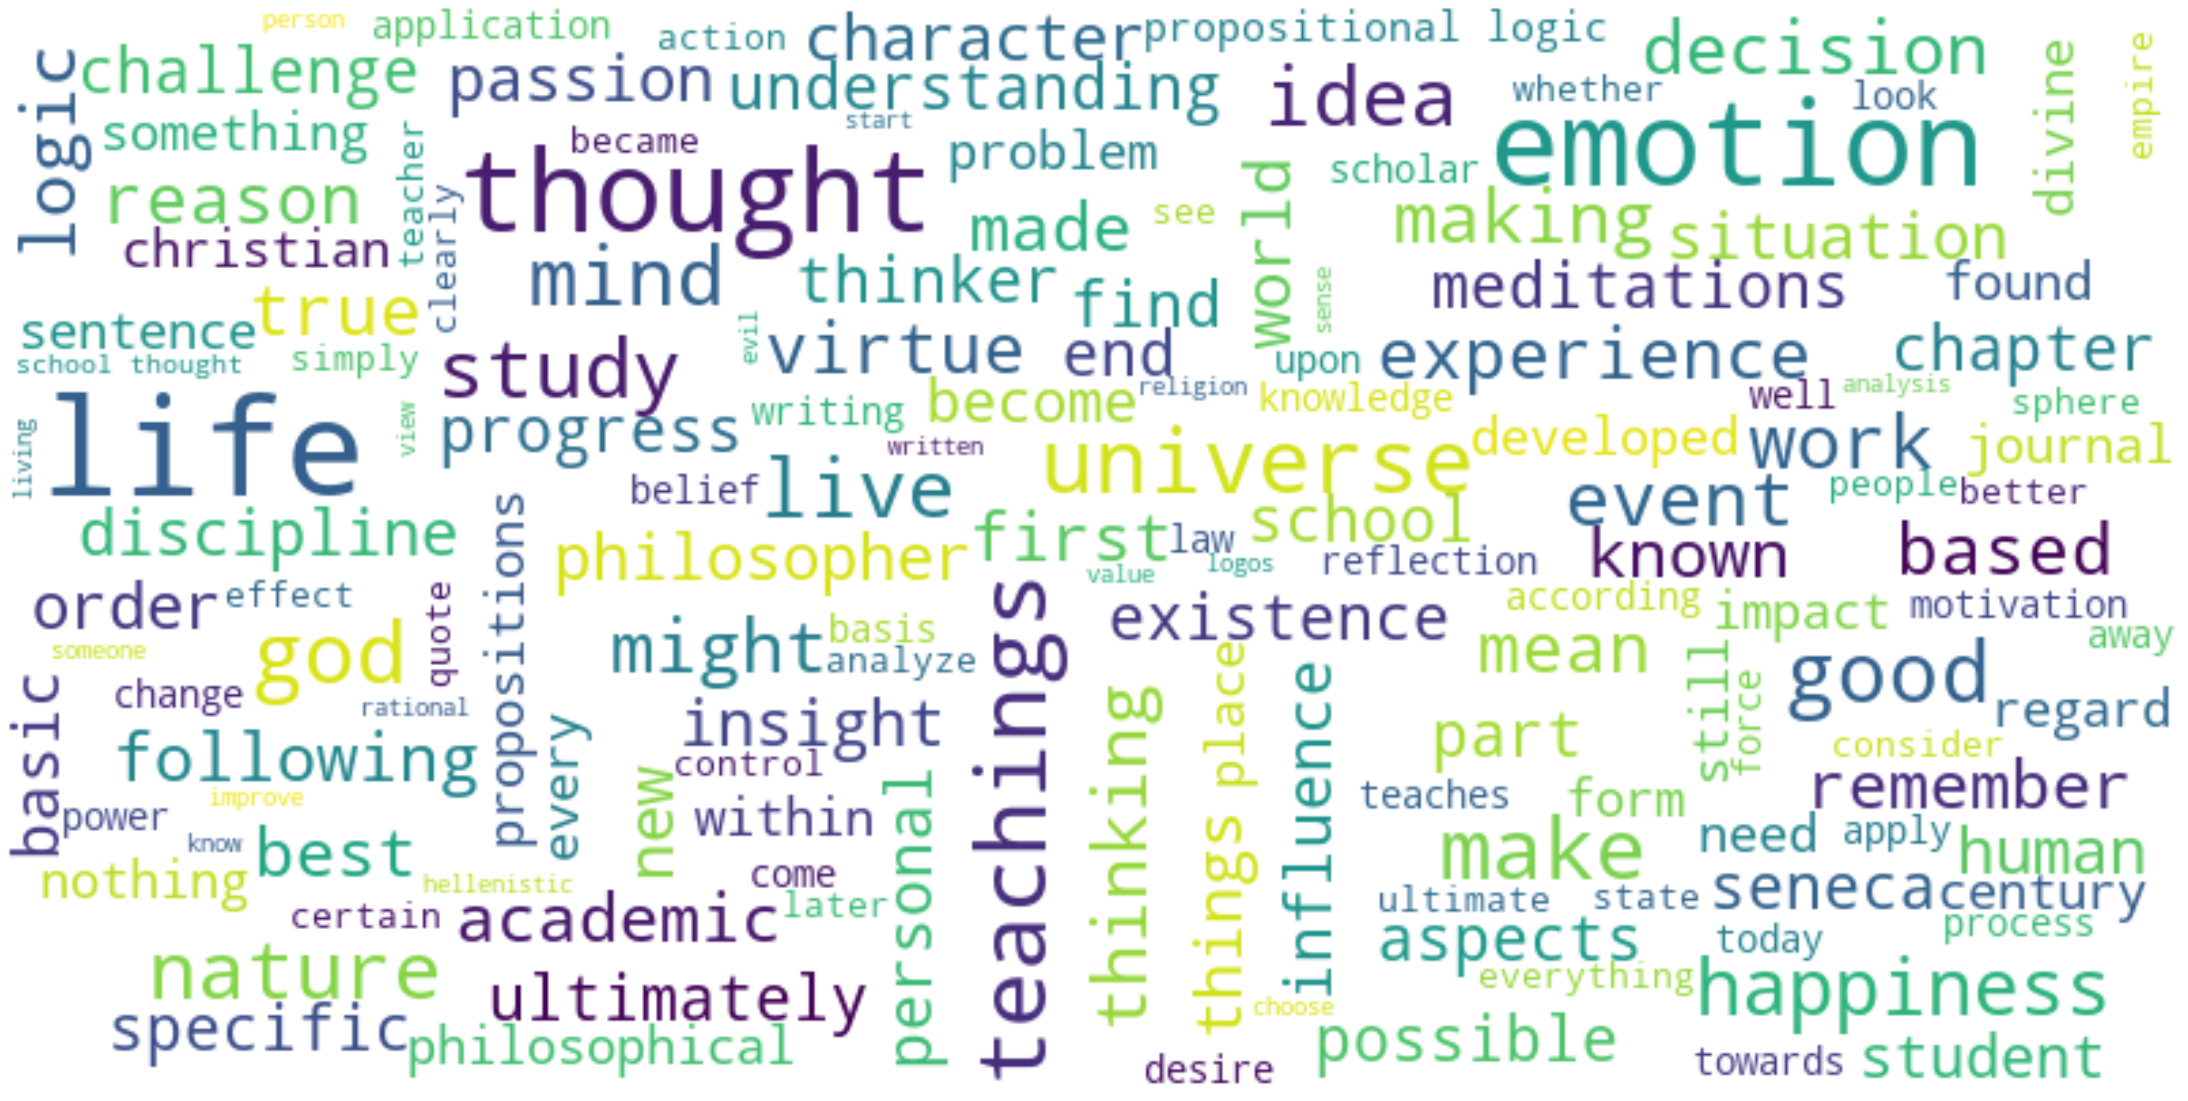

In [223]:
wordcloud = WordCloud(width=800, height=400,max_font_size=50, max_words=150, background_color="white").generate("+".join(filtered_words))
plt.figure(figsize=(40,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [224]:
wordcloud.to_file('stoicism.png')